# Сезона грипа

Да ли је број заражених грипом константан током године? Или се грип заиста јавља периодично/сезонски? Да ли су евентуалне правилности сличне у различитим државама? 
У потрази за одговорима на ова и/ли слична питања у вези са ширењем грипа (или прецизније вирусног обољења - изазваног вирусима типа инфлуенца А, Б или Ц) помоћи ће нам подаци Светске здравствене организације која кроз пројекат "FluNet" већ преко 20 година прати ширење вируса грипа. 
Подаци за различите државе могу се преузети [овде]( http://apps.who.int/flumart/Default?ReportNo=12), a неке од визуализација ових података могу се пронаћи на [сајту Светске здравствене организацаије](https://www.who.int/influenza/gisrs_laboratory/flunet/en/). У наставку ћемо научити како да репродукујемо неке од ових визуализација у пајтону и како да више сазнамо о сезоналности грипа користећи претходно преузете податке.
Специјално:
* по први пут ћемо се сусрести са подацима који имају временске одреднице и пратићемо број заражених из недеље у недељу 
* информације ћемо визуелно представити различитим линијским и стубичастим дијаграмима и упоредити их
* анализираћемо трајање сезоне грипа у Србији и другим земљама

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt

import seaborn as sns

## у Србији

У фолдеру подаци наћи ћете претходно преузете фајлове са сајта СЗО које ћемо анализирати у наставку. За почетак, учитаћемо податке о праћењу грипа у Србији за целокупан доступан период, и функцијом [**head**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) ћемо погледати почетак табеле:

In [2]:
grip_rs = pd.read_csv('grip data/Serbia_Flu_WHO_24072020.csv')
grip_rs.head(2)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,Serbia,European Region of WHO,South West Europe,2007,1,01/01/2007,07/01/2007,NaN,4.0,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,No Activity
1,Serbia,European Region of WHO,South West Europe,2007,2,08/01/2007,14/01/2007,NaN,8.0,3.0,...,NaN,0.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,Sporadic


Видимо да нам је на располагању 22 различите колоне, па како их је много функција **head** нам даје скраћен приказ. Уз помоћ функције [**info**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) проверићемо називе и тип података у свим колонам:

In [3]:
grip_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 22 columns):
Country              708 non-null object
WHOREGION            708 non-null object
FLUREGION            708 non-null object
Year                 708 non-null int64
Week                 708 non-null int64
SDATE                708 non-null object
EDATE                708 non-null object
SPEC_RECEIVED_NB     160 non-null float64
SPEC_PROCESSED_NB    475 non-null float64
AH1                  419 non-null float64
AH1N12009            444 non-null float64
AH3                  475 non-null float64
AH5                  160 non-null float64
ANOTSUBTYPED         475 non-null float64
INF_A                475 non-null float64
BYAMAGATA            440 non-null float64
BVICTORIA            440 non-null float64
BNOTDETERMINED       452 non-null float64
INF_B                452 non-null float64
ALL_INF              475 non-null float64
ALL_INF2             90 non-null float64
TITLE                70

Прво што можемо приметити - број уноса по колонама није исти у свакој од 22 колоне. 
Првих пар колона које дефинишу државу, регион коме припада и временске одреднице (година, редни број недеље у току године, датум почетка и краја недеље) имају највише уноса, док колоне које су везане за број узорака (енг. *SPEC_PROCESSED_NB*) и број узорака у којима је детектован вирус (типа А *INF_A*, типа Б, *INF_B* или укупно *ALL_INF*) имају мање уноса. То је вероватно зато што за неке недеље нема података, но то ћемо ускоро истражити. Интересантно је и што међу подацима имамо информације о броју заражених узорака по врстама детектованих вируса (нпр. *AH1N12009* или *BYAMAGATA*).
Скоро све колоне су нумеричког типа (целобројни *int64* и рационални *float64*) што чини предстојећу анализу једноставнијом. Додатно примећујемо да колоне за које смо очекивали да буду препознате као датуми (SDATE, енг. 'start date' и EDATE енг. 'end date') имају тип *object*, зато ћемо у наставку те колоне превести у одговарајући формат уз помоћ функције [**to_datetime**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) у оквиру библиотеке *pandas*.

In [4]:
grip_rs['SDATE'] = pd.to_datetime(grip_rs['SDATE'], format="%d/%m/%Y")

Да будемо сигурни да разумемо шта ова функција ради, трансформисали смо само колону *SDATE* па тип и формат ових података можете у наставку можете упоредити са колоном *EDATE*:

In [5]:
grip_rs.head(2)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,Serbia,European Region of WHO,South West Europe,2007,1,2007-01-01,07/01/2007,NaN,4.0,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,No Activity
1,Serbia,European Region of WHO,South West Europe,2007,2,2007-01-08,14/01/2007,NaN,8.0,3.0,...,NaN,0.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,Sporadic


Обратите пажњу да смо у функцију **to_datetime** морали да додамо опциони аргумент *format* зато што би у супротном 07.01.2007. године био препознат као 01. јул а не као 07. јануар како ми желимо. На исти начин трансформисаћемо колону *EDATE*:

In [6]:
grip_rs['EDATE'] = pd.to_datetime(grip_rs['EDATE'], format="%d/%m/%Y")

У анализи података битно нам је да проверимо тачност и доследност података, што није увек ни лак а често ни могућ посао, али бар основне провере конзистентности су често доступне. Овде на пример, није нам потребно да имамо датум и почетка и краја недеље, али постојање оба нам може користи да проверимо конзистентност. 
За почетак, проверићемо да ли се подаци о почетку недеље односе на почетак радне недеље, тј. понедељак. Функција [**weekday()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html) нам даје ту информацију, враћајући број од 0 до 6, за дане од понедељка до недеље. Погледајмо исход ове функције на првом елемeнту колоне *SDATE*:

In [7]:
grip_rs.loc[0]['SDATE'].weekday()

0

Можемо проверити и да ли су почетак и крај недеље увек удаљени једнак број дана (6), и ако је то тачно једна од колона нам је вишак. Иако то можемо проверити и користећи претходно уведену функцију **weekday** (покушајте!) за тип података који је препознат као временска одредница можемо обављати најједноставније одузимање:

In [8]:
grip_rs.loc[0]['EDATE'] - grip_rs.loc[0]['SDATE']

Timedelta('6 days 00:00:00')

Проверили смо да је удаљеност између почетка и краја недеље очекивана за први ред у табели, хајдемо сада да проверимо да ли то важи за целу табелу. Сетимо се, у оквиру *pandas* библиотеке можемо одузимати колоне, елемент по елемент, тј. позивањем ```grip_rs['EDATE'] - grip_rs['SDATE']``` добијамо нову колону чији су елементи у сваком реду настали одузимањем елемената у истом реду полазних колона:

In [9]:
grip_rs['EDATE'] - grip_rs['SDATE']

0     6 days
1     6 days
2     6 days
3     6 days
4     6 days
5     6 days
6     6 days
7     6 days
8     6 days
9     6 days
10    6 days
11    6 days
12    6 days
13    6 days
14    6 days
15    6 days
16    6 days
17    6 days
18    6 days
19    6 days
20    6 days
21    6 days
22    6 days
23    6 days
24    6 days
25    6 days
26    6 days
27    6 days
28    6 days
29    6 days
       ...  
678   6 days
679   6 days
680   6 days
681   6 days
682   6 days
683   6 days
684   6 days
685   6 days
686   6 days
687   6 days
688   6 days
689   6 days
690   6 days
691   6 days
692   6 days
693   6 days
694   6 days
695   6 days
696   6 days
697   6 days
698   6 days
699   6 days
700   6 days
701   6 days
702   6 days
703   6 days
704   6 days
705   6 days
706   6 days
707   6 days
Length: 708, dtype: timedelta64[ns]

Да бисмо се уверили да у овој колони од 708 елемената (чији је приказ изнад скраћен) не постоји ред у коме је број дана различит од 6, издвојићемо само дане [**days**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.days.html) и погледаћемо само јединствене елементе у колони [**unique**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html):

In [10]:
(grip_rs['EDATE'] - grip_rs['SDATE']).dt.days.unique()

array([6], dtype=int64)

Како се табла *grip_rs* односи само на Србију, прве три колоне су увек исте садржине (проверите!), па ћемо их избацити функцијом [**drop**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), уз колону о крајњем датуму недеље:

In [11]:
grip_rs = grip_rs.drop(columns=['Country','WHOREGION','FLUREGION','EDATE'])

In [12]:
grip_rs.head(2)

,Year,Week,SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,2007,1,2007-01-01,NaN,4.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,No Activity
1,2007,2,2007-01-08,NaN,8.0,3.0,NaN,1.0,NaN,0.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,Sporadic


Предност трансформисања података о почетку недеље у временске одреднице постаће већ сад видљива зато што ту колону сада можемо директно проследити у функцију за цртање графика и х оса ће бити адекватно обележена подеоцима који одговарају датумима (пробајте поново да учитате податке и без трансформације нацртате исто, исход ће бити другачији):

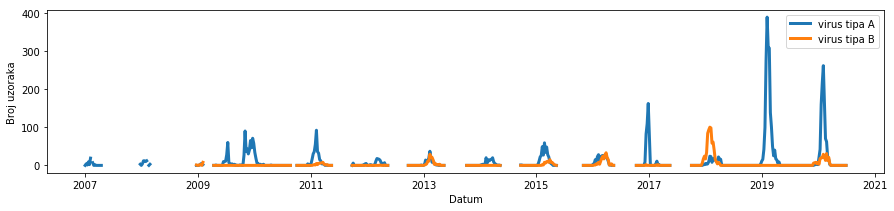

In [13]:
plt.figure(figsize=(15,3))
plt.plot(grip_rs['SDATE'], grip_rs['INF_A'], label='virus tipa A',linewidth=3)
#sns.lineplot(grip_rs['SDATE'], grip_rs['INF_A'], label='virus tipa A',linewidth=3)
plt.plot(grip_rs['SDATE'], grip_rs['INF_B'], label='virus tipa B',linewidth=3)
#sns.lineplot(grip_rs['SDATE'], grip_rs['INF_B'], label='virus tipa B',linewidth=3)

plt.legend()
plt.xlabel('Datum')
plt.ylabel('Broj uzoraka')

plt.show()

Већ на овом графику уочавамо да линије нису повезане зато што немамо податке за све недеље, што објашњава разлику између броја елемената у колонама *SDATE* и *INF_A* или *INF_B*.

Линије кода које су коментарисане приказују другу функцију често коришћену за цртање линијских дијаграма, испробајте и њу. Шта примећујете? Позабавићемо се третманом недостајаћих података касније у овој свесци.

У оквиру [**plot**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) функције смо дефинисали и дебљину линије уз помоћ аргумента *linewidth* и свакој од линија доделили назив уз помоћ *label* што омогућава одговарајуће цртање легенде позивањем функције [**legend**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html).

Видимо да су у неким периодима оба типа вируса присутна (нпр. 2013. година), некада доминира вирус типа Б (2018. година), а некада је значајно присутнији тип А (2019. година). У наставку ћемо погледати мало ближе период од последњих 5 година селектујући само оне податке из табеле у којима је вредност године ```grip_rs['SDATE'].dt.year``` 2015 и више:

In [14]:
poslednjih5god = grip_rs[grip_rs['SDATE'].dt.year>=2015].copy()

График ћемо нацртати на сличан начин:

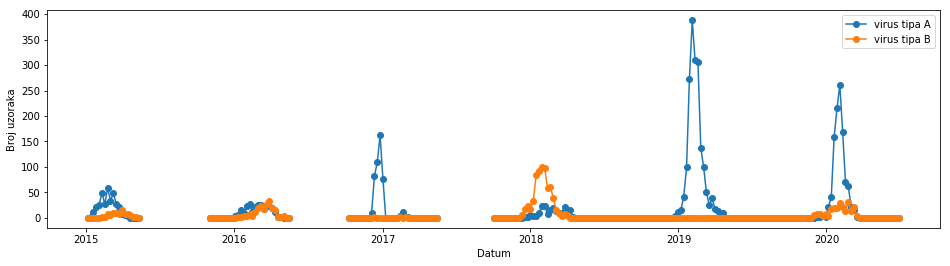

In [15]:
plt.figure(figsize=(16,4))
plt.plot(poslednjih5god['SDATE'], poslednjih5god['INF_A'], marker='o', label='virus tipa A')
plt.plot(poslednjih5god['SDATE'], poslednjih5god['INF_B'], marker='o', label='virus tipa B')
plt.legend()
plt.xlabel('Datum')
plt.ylabel('Broj uzoraka')
plt.show()

Овде смо искористили опцију *marker* да обезбедимо да су јасно назначене вредности из табеле одговарајућим маркерима, у овом случају круговима. Обратите пажњу да маркери не постоје дуж целог посматраног времена. То је зато што за неке недеље не постоји бројна вредност у табели (што смо приметили и исрекиданошћу линије на претходном графику).

На графику који следи, исти подаци су приказани у фомату који је присутнији на сајту Светске здравствене организације, тј. стубичастим дијаграмом (сваки стубић одговара једној недељи), а стубићи за два типа вируса се настављају један на други, тј. очитавање на у оси највиших стубића говори нам о броју узорака са оба типа вируса (нпр током 2016. или 2018. године када су присутна оба типа вируса).

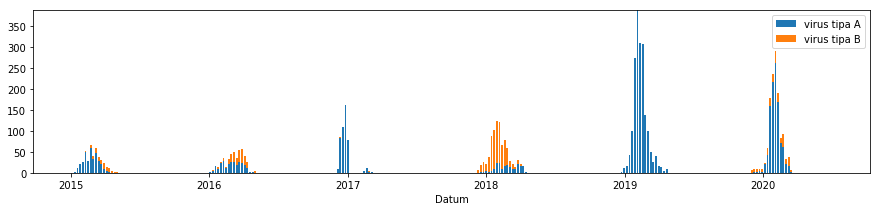

In [16]:
plt.figure(figsize=(15,3))
plt.bar(poslednjih5god['SDATE'], poslednjih5god['INF_A'], width=5, label='virus tipa A')
plt.bar(poslednjih5god['SDATE'], poslednjih5god['INF_B'], bottom=poslednjih5god['INF_A'], width=5, label='virus tipa B')
plt.legend()
plt.xlabel('Datum')
plt.show()

Стубичасти дијаграми који се настављају један на други су значајно бољи ако је циљ визуализације да представи пре свега укупан број детектованих узорака (без обзира на тип) и да проценимо периоде доминације једног односно другог вируса. Ако пак желимо да директније имамо увид у бројеве појединачних података, онда је стубичасти дијаграм са упоредно постављеним стубићима или линијски плот као на слици изнад лакши за сналажење.

Са претходних графика се чини да постоје понављања када су у питању моменти када број заражених крене да расте, погледајмо то детљније тако што ћемо све године ставити на један график у виду више линија које иду од 1. јануара до краја године. Пре цртања, увешћемо нову колону у којој ћемо избројати колико дана је протекло од 1. јануара до тада, то радимо функцијом [**dayofyear**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofyear.html).

In [17]:
grip_rs['time_of_year']=grip_rs['SDATE'].dt.dayofyear

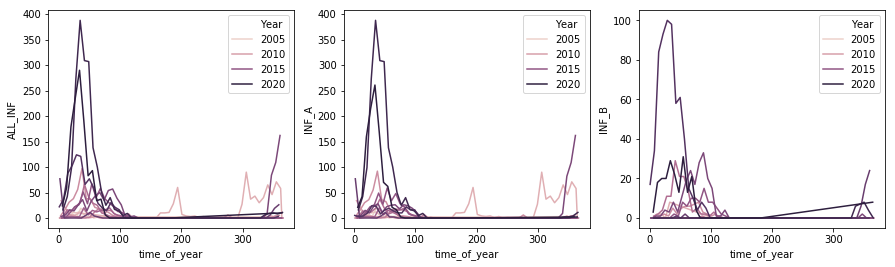

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.lineplot(grip_rs['time_of_year'], grip_rs['ALL_INF'],hue=grip_rs['Year'])
plt.subplot(1,3,2)
sns.lineplot(grip_rs['time_of_year'], grip_rs['INF_A'],hue=grip_rs['Year'])
plt.subplot(1,3,3)
sns.lineplot(grip_rs['time_of_year'], grip_rs['INF_B'],hue=grip_rs['Year'])

plt.show()

На првом графику с лева видимо укупан број инфицираних узорака, где линије различитих нијанси одговарају различитим годинама (граничне године дате су у легенди као водиља). На другом и трећем графику су узорци заражени вирусом типа А и Б, редом.
Иако доста грубо, ови графици нам приказују постојање сезоналности у појавама грипа, бар у Србији. Видимо да се током целог посматраног периода од 13 година, грип типа А јавио само једном током летњих месеци, док су оба типа активна током прва три месеца године и последњег месеца у години.

Линијски плот [**lineplot**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) у оквиру *seaborn* библиотеке нам нуди и опцију да усредњи податке за нас када за исте вредности х осе постоји више вредности у координате. Ако погледамо претходне податке на нивоу недеља (које се понављају у информацијама за сваку годину у распону од 1 до 53), усредњени трендови раста узорака са детектована оба типа грипа налазе се у наставку:

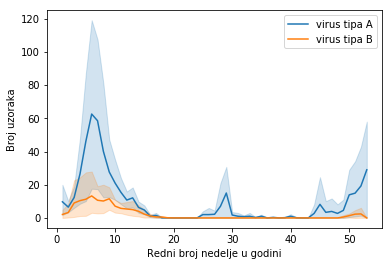

In [19]:
sns.lineplot(x='Week',y='INF_A',data=grip_rs,label='virus tipa A',ci=90)
sns.lineplot(x='Week',y='INF_B',data=grip_rs,label='virus tipa B',ci=90)
plt.xlabel('Redni broj nedelje u godini')
plt.ylabel('Broj uzoraka')
plt.show()

Подебљана линија у средини ових обојених региона, одговара просечној вредности броја детектовани узорака за одговарајућу редну недељу у години. Означени региони светлијим нијансама исте боје означавају интервал вредности по у оси у оквиру кога се налази 90% измерених вредности у временском периоду који посматрамо. Проценат вредности које на овај начин желимо да означимо контролишемо аргументом *ci*, истражите како се дијаграм мења када мењате ове вредности.

Поређења ради, на следећем графику су линијски плот просечне вредности узоратака типа А за сваку недељу представљени поред тачкастих вредности за све године. Коментарисане су линије кода које приказују исто за вирус типа Б, истражите и то!

Text(0,0.5,'Broj uzoraka')

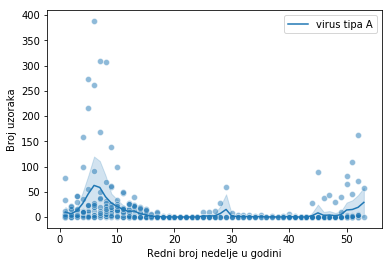

In [20]:
sns.lineplot(x='Week',y='INF_A',data=grip_rs,label='virus tipa A',ci=90)
sns.scatterplot(x='Week',y='INF_A',data=grip_rs,alpha =0.5)
# sns.lineplot(x='Week',y='INF_B',data=grip_rs,label='virus tipa B',ci=90)
# sns.scatterplot(x='Week',y='INF_B',data=grip_rs,alpha =0.5)
plt.xlabel('Redni broj nedelje u godini')
plt.ylabel('Broj uzoraka')
# plt.ylim([-5,160])

Слично, користећи функцију [**hist**](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) можемо избројати колико се пута свака од недеља у току године нашла у сезони грипа (постоји бар 1 узорак забележен у колони свих инфицираних, енг. *ALL_INF*):

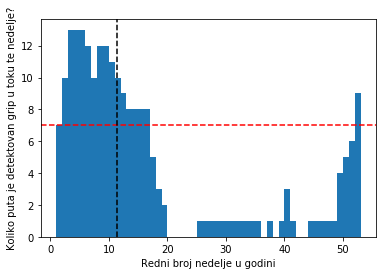

In [21]:
plt.hist(grip_rs[grip_rs['ALL_INF']>0]['Week'], bins=range(1,54))
plt.xlabel('Redni broj nedelje u godini')
plt.ylabel('Koliko puta je detektovan grip u toku te nedelje?')
plt.axhline(y=7,color='red',linestyle='dashed')

plt.axvline(x=(31+28+21)/7,color='black',linestyle='dashed')

plt.show()

Како су претходни подаци у распону од 14 година (од 2007 до 2020), црвеном хоризонталном линијом означили смо половину. Видимо да су последња недеља у години, и готово првих 20 недеља у преко 50% посматраних година биле захваћене сезоном грипа. (Црна испрекидана линија означава почетак пролећа.)

## у Европи

На досада већ увежбан начин учитавамо податке и проверавамо прва два реда:

In [22]:
eurodata = pd.read_csv('grip data/Europe_Flu_WHO_27072020.csv')
eurodata.head(2)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,Belarus,European Region of WHO,Eastern Europe,2007,2,08/01/2007,14/01/2007,NaN,0.0,0.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Sporadic
1,Belarus,European Region of WHO,Eastern Europe,2007,7,12/02/2007,18/02/2007,NaN,20.0,0.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,Local Outbreak


Хајде да видимо сада шта се налази у претходно брисаним колонама о регионима *WHOREGION* и *FLUREGION*:

In [23]:
eurodata.WHOREGION.unique()

array(['European Region of WHO'], dtype=object)

Као што смо очекивали обзиром да смо преузимали Европске податке *WHOREGION* има само једну вредност - Европа. А шта се налази у колони *FLUREGION*?

In [24]:
eurodata.FLUREGION.unique()

array(['Eastern Europe', 'South West Europe', 'Northern Europe',
       'Western Asia', 'Central Asia'], dtype=object)

Ова колона садржи и неке регионе који су ван Европе, хајде да видим које земље су у тим регионима, нпр. у Централној Азији:

In [25]:
eurodata[eurodata.FLUREGION=='Central Asia'].Country.unique()

array(['Kazakhstan', 'Kyrgyzstan', 'Uzbekistan', 'Tajikistan',
       'Turkmenistan'], dtype=object)

Светска здравствена организација идентификује различите регионе ширења грипа, ти региони са земљама које се налазе у њима излистани су [овде](https://www.who.int/influenza/surveillance_monitoring/updates/Influenza_Transmission_Zones.pdf?ua=1) и то су подаци које видимо у колони *FLUREGION*.

Слично као и у случају података за Србију, неопходно је да податак о почетку недеље пребацимо у одговоарајући формат да би нам даља анализа била лакша:

In [26]:
eurodata['SDATE'] = pd.to_datetime(eurodata['SDATE'], format="%d/%m/%Y")

Можемо за почетак видети који је укупан број узорака оба типа вируса забалежен у FluNet бази у посматраном периоду. То ћемо урадити тако што ћемо груписати податке по почетном датуму ('SDATE') функцијом [**groupby**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) и одабрати да сумирамо све податке за вирус типа А и типа Б. Дакле независно од државе и регије, сви узорци за исту недељу сумирани су и нацртани на наредном дијаграму:

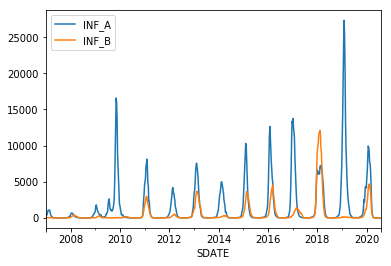

In [27]:
eurodata.groupby(['SDATE'])['INF_A','INF_B'].sum().plot()
plt.show()

Овде смо и демонстрирали да се табеле могу нацртати и коришћењем [**plot**](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) у оквиру *pandas* библиотеке - пробајте да исти график нацртате као и до сада користећи **plt.plot()** шта је другачије?
(dataframe.plot() је базирана на истој функцији *matplotlib* библиотеке, али су неке опције аутоматски подешене у складу са табелом коју цртамо)

Видимо да за 2019. годину у једној недељи има и преко 25000 заражених узорака типа А, и осим у случају 2018. године, увек има више узорака заражених типом А, него типом Б (упоредите плаву и наранџасту линију на графику).

Даље, користећи груписање по недељи и региону, можемо сачувати одговарајуће податке у нову табелу коју ћемо користити да нацртамо аналогне графике за појединачне регионе.

In [28]:
euroregions = pd.DataFrame(eurodata.groupby(['SDATE','FLUREGION'])['INF_A','INF_B'].sum()).reset_index()
euroregions.head(2)

,SDATE,FLUREGION,INF_A,INF_B
0,2007-01-01,Eastern Europe,10.0,1.0
1,2007-01-01,Northern Europe,72.0,0.0


За потребе графика у наставку називе различитих региона из колоне *FLUREGION* ћемо сачувати у новој листи:

In [29]:
regions = euroregions.FLUREGION.unique()
regions[0] # излиставамо први елемент да проверимо његов садржај

'Eastern Europe'

Фокусираћемо се у наставку на информације само у последњих 10 година, на већ извежбан начин: 
(Одлука да смањимо посматрани период није неопходна, можете одабрати било који период)

In [30]:
euroregions = euroregions[euroregions.SDATE.dt.year>=2011]

Из ове подгрупе података можемо нацртати један график на пример за источну Европу:

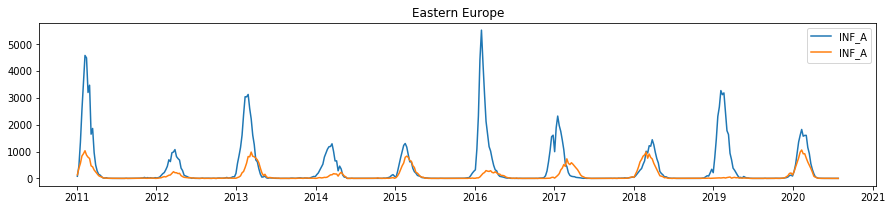

In [31]:
plt.figure(figsize=(15,3))
plotdata=euroregions[euroregions['FLUREGION']=='Eastern Europe']
plt.plot(plotdata['SDATE'],plotdata['INF_A'],label='INF_A')
plt.plot(plotdata['SDATE'],plotdata['INF_B'],label='INF_A')
plt.legend()
plt.title('Eastern Europe')
plt.show()

Овде јасно учавамо да се грип понавља у сличним периодима, као и да је вирус типа А доминантнији. Да проверимо да ли су ови закључци слични и у осталим регионима, ових пар линја кода убацити у једну петљу којом ћемо проћи кроз све доступне регионе и нацртати одговарајуће графике које ћемо лакше упоредити:

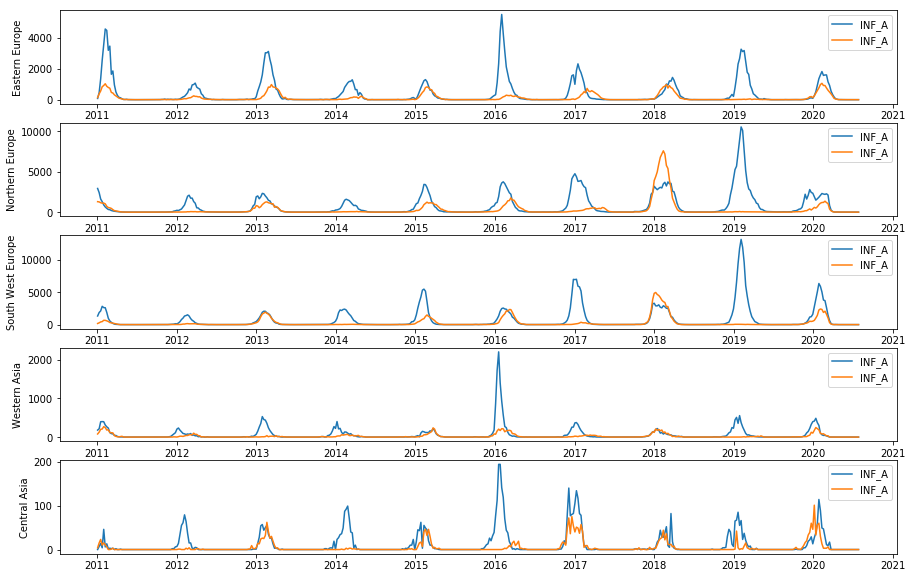

In [32]:
plt.figure(figsize=(15,10))
for i in range(len(regions)):
    plt.subplot(5,1,i+1)
    plotdata=euroregions[euroregions['FLUREGION']==regions[i]]
    plt.plot(plotdata['SDATE'],plotdata['INF_A'],label='INF_A')
    plt.plot(plotdata['SDATE'],plotdata['INF_B'],label='INF_A')
    plt.legend()
    plt.ylabel(regions[i])
plt.show()

Када су нам подаци овако графички излистани, лакше их можемо упоредити и приметити сличности и разлике. Видимо да су сви региони имали највише случајева грипа у 2016 или 2019 години. Будите опрезни и приметите да је број узорака коме одговарају ови највећи пикови различит за различите регионе - и преко 10 000 у северној и југозападној Европи, а испод 200 у оном делу централне Азије који се налази у посматраном сету података.
Као што смо приметили у агрегираним подацима за целу Европу, једина година у којој је вирус В доминантан је 2018, а асда видимо да није једнако доминантан у свим регионима, већ посебно у северној и југозападној Европи.

Као и у анализи података за Србију, и у овом случају, поред плотова у којима гледамо бројно стање за 10 година уназад, можемо погледати и просечне податке из недеље у недељу са циљем да проверимо да ли се периоди са повећаним бројем детектованих грипозних стања разликују у овим различитим регијама. То ћемо опет урадити у оквиру for петље за све регионе заједно:

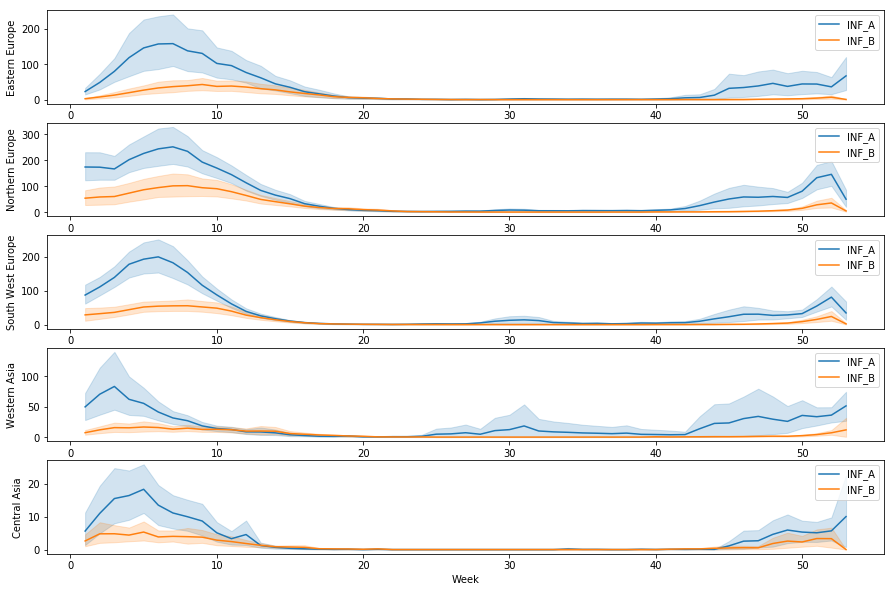

In [33]:
plt.figure(figsize=(15,10))
for i in range(len(regions)):
    plt.subplot(5,1,i+1)
    sns.lineplot(x='Week',y='INF_A',data=eurodata[eurodata['FLUREGION']==regions[i]],ci=90,label='INF_A')
    sns.lineplot(x='Week',y='INF_B',data=eurodata[eurodata['FLUREGION']==regions[i]],ci=90,label='INF_B')
    plt.legend()
    plt.ylabel(regions[i])

Сад јасно видимо да позиција максималног броја заражених грипом није иста у различитим регионима (видите на пример позицију максимума на плавој линији у западној Азији и северној Европи). Такође видимо да у неким регионима сезона грипа траје дуже (упоредите на пример када се плава линија спушта до нуле у југозападној и истрочној Европи).

Хајде да још екстремније тестирамо ово запажање да географски регион утиче на време сезоне грипа. Учитаћемо још један сет података којим се нећемо пуно бавити већ ћемо само поновити претходне кораке (учитавање, форматирање датума, груписање и цртање просечног линијског дијаграма) и упоредити добијени график са досада анализираним:

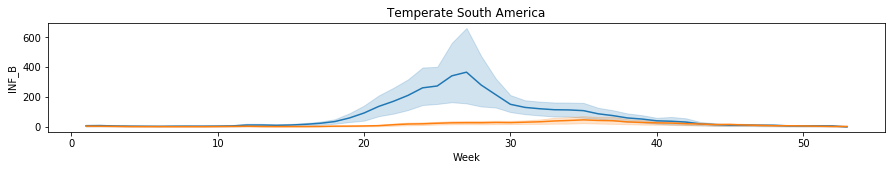

In [36]:
plt.figure(figsize=(15,2))
juznaamerika = pd.read_csv('grip data/Temperate_South_America_Flu_WHO_24072020.csv')
juznaamerika['SDATE'] = pd.to_datetime(juznaamerika['SDATE'], format="%d/%m/%Y")
juznaamerika_group = pd.DataFrame(juznaamerika.groupby(['Week','SDATE'])['INF_A','INF_B'].sum()).reset_index()
sns.lineplot(x='Week',y='INF_A',data=juznaamerika_group,ci=90)
sns.lineplot(x='Week',y='INF_B',data=juznaamerika_group,ci=90)
plt.title('Temperate South America')
plt.show()

Као што сте можда претпоставили, график на коме је назначена сезона грипа у Јужној Америци значајно се разликује од графика за Србију или регионе у близини које смо разматрали - сезона грипа је око 20-30 недеље, односно током нашег лета, али и јужноамеричке зиме. Овај податак иде у прилог чињеници да до ширења грипа долази углавном током зимских месеци (када год се они одвијају у локалној географској средини).

## у Србији и суседним земљама

У наставку ћемо додатно испитати земље у суседству, са циљем да проверимо да ли смо са неком од суседних земаља посебно усклађени у смислу избијања и замирања сезона грипа. 
За почетакм у листи *rs_susedi* набројали смо све земље са којима се Србија граничи:

In [37]:
rs_susedi = ['Albania','Bosnia and Herzegovina','Croatia','Montenegro','North Macedonia','Serbia', 'Bulgaria','Hungary','Romania']

На основу ове листе, можемо направити селекцију у оквиру Европских података. 
Услов ``` eurodata['Country'].isin(rs_susedi)]``` ће бити испуњен кад год је у датом реду земља једна од земаља у датој листи, стога тако можемо селектовати подскуп табеле који ће садржати само земље из листе *rs_susedi*.

In [38]:
susedi_df = eurodata[eurodata['Country'].isin(rs_susedi)]

Можемо проверити да ли број различитих земаља у листи *rs_susedi* одговара броју јединствених елемената у колони са земљама наше нове табеле:

In [39]:
len(rs_susedi)==len(susedi_df.Country.unique())

True

У наставку су линијски плотови за вирусe типа А и Б, за сваку од издвојених земаља:

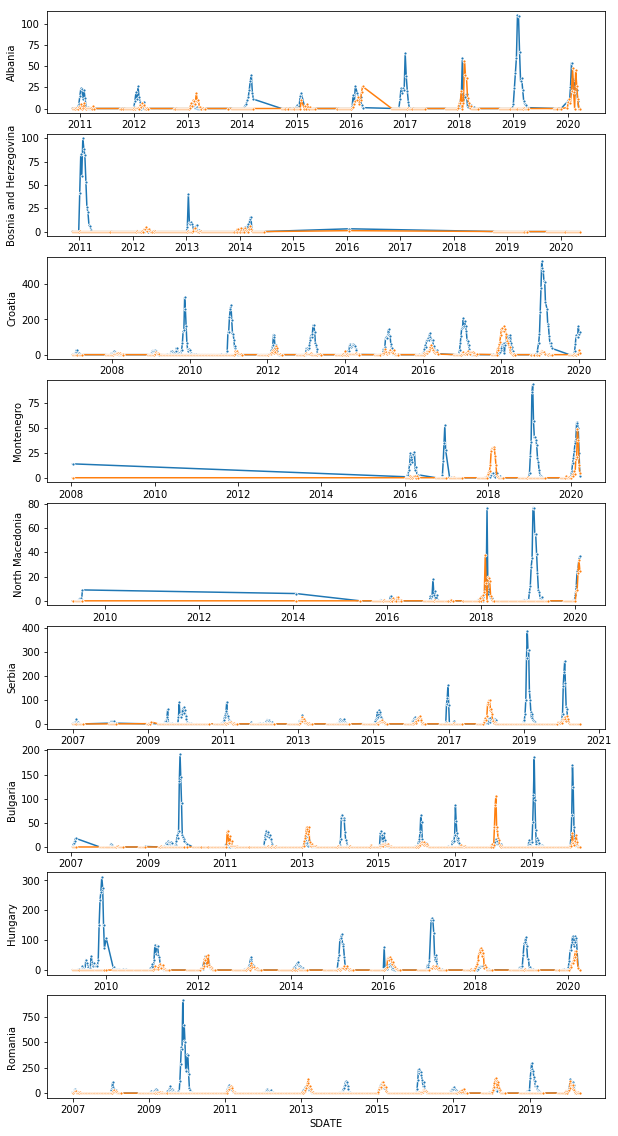

In [40]:
plt.figure(figsize=(10,20))
for i in range(len(rs_susedi)):
    plt.subplot(len(rs_susedi),1,i+1)
    sns.lineplot(data=susedi_df[(susedi_df['Country']==rs_susedi[i])], x='SDATE',y="INF_A",marker='.')
    sns.lineplot(data=susedi_df[(susedi_df['Country']==rs_susedi[i])], x='SDATE',y="INF_B",marker='.')
    plt.ylabel(rs_susedi[i])

Видимо да не постоје за све земље подједнако детаљни подаци. Специјално, чини се као да је у БиХ престало извештавање у неком тренутку, тако да ћемо те податке избацизи из даљег разматрања. Такође видимо да за неке земље прикупљање података починње тек од 2016 године, стога ћемо све посматрати за период од 2016. до 2020. године.

In [41]:
rs_susedi = ['Albania','Croatia','Montenegro','North Macedonia','Serbia', 'Bulgaria','Hungary','Romania']
susedi_df = eurodata[eurodata['Country'].isin(rs_susedi)]
susedi_df = susedi_df[(susedi_df.SDATE.dt.year>=2016)]
susedi_df.head(2)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
14994,Albania,European Region of WHO,South West Europe,2016,1,2016-01-04,10/01/2016,NaN,2.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,No Report
14995,Albania,European Region of WHO,South West Europe,2016,2,2016-01-11,17/01/2016,NaN,29.0,0.0,...,NaN,0.0,3.0,0.0,1.0,0.0,1.0,4.0,NaN,No Report


*Поновите цртање претходног низа графика за ову табелу, сада ће х оса бити иста па ћете лакше уочити да ли је у различитим земљама иста година била критична и слично.*

У наставку желимо да проверимо да ли постоје везе између проаста броја облелих од грипа у овим земљама. 
Направићемо посебну табелу на основу држава суседа у којој су подаци груписани по држави и датуму, за почетак само за вирус типа А:

In [42]:
infA = pd.DataFrame(susedi_df.groupby(['Country','SDATE'])['INF_A'].sum())
infA.head()

INF_A
Country SDATE            
Albania 2016-01-04    0.0
        2016-01-11    3.0
        2016-01-18   16.0
        2016-01-25    6.0
        2016-02-01   26.0

Ова дугачка табела има два индекса (име државе и датум) и једну колону са нама значајним подацима - број узорака заражених вирусом типа А. Трансформисаћемо ову табелу тако да има смао један индекс - датуме, а различите државе ће постати нове колоне у којима се налазе подаци за вирус типа А. То можемо урадити функцијом [**unstack**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html):

In [43]:
infA = infA.unstack(0)
infA.head()

INF_A                                                      \
Country    Albania Bulgaria Croatia Hungary Montenegro North Macedonia   
SDATE                                                                    
2016-01-04     0.0      2.0     7.0     0.0        NaN             0.0   
2016-01-11     3.0      4.0    31.0    76.0        1.0             0.0   
2016-01-18    16.0     12.0    54.0     2.0        0.0             0.0   
2016-01-25     6.0     16.0    44.0     5.0        3.0             1.0   
2016-02-01    26.0     31.0    85.0     3.0        3.0             4.0   

                           
Country    Romania Serbia  
SDATE                      
2016-01-04     6.0    3.0  
2016-01-11    11.0    5.0  
2016-01-18    42.0   15.0  
2016-01-25   129.0   10.0  
2016-02-01   234.0   23.0

Мешутим, овом трансформацијом, добили смо имена колона у више нивоа, проверимо то:

In [44]:
infA.columns

MultiIndex(levels=[['INF_A'], ['Albania', 'Bulgaria', 'Croatia', 'Hungary', 'Montenegro', 'North Macedonia', 'Romania', 'Serbia']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]],
           names=[None, 'Country'])

То значи да не можемо једноставно позивањем само ```infA['Serbia']``` добити листу података за Србију како смо желели (пробајте!). Да то решимо, променићемо имена колонама на следећи начин:

In [45]:
infA.columns = infA.columns.get_level_values(1)
infA.head()

Country,Albania,Bulgaria,Croatia,Hungary,Montenegro,North Macedonia,Romania,Serbia
SDATE,,,,,,,,
2016-01-04,0.0,2.0,7.0,0.0,NaN,0.0,6.0,3.0
2016-01-11,3.0,4.0,31.0,76.0,1.0,0.0,11.0,5.0
2016-01-18,16.0,12.0,54.0,2.0,0.0,0.0,42.0,15.0
2016-01-25,6.0,16.0,44.0,5.0,3.0,1.0,129.0,10.0
2016-02-01,26.0,31.0,85.0,3.0,3.0,4.0,234.0,23.0


Да заобиђемо могуће компликације када у табели недостају бројеви (NaN), попунићемо одговарајуће ћелије. Рад са недостајућим вредностима је врло често део сређивања и обраде података (зато што често функције не могу да баратају са низовима који садрже NaN) тако да је битно да бар на кратко продискутујемо пар типичних стратегија. Најчешћи начин да приступите недостајућим подацима је - да обришете све редове који немају потпуне податке (у овом случају све недеље за које нека од држава није послала податке), или да избегнемо губљење драгоцених података у другим колонама - да попуните празне ћелије. Додавање вредности је потребно радити доста пажљиво и посебно у случају доношења закључака на основу података треба бити сигуран да закључци нису последица тих додатих вредности. Најчешће се нове вредности додају или на основу разумне претпоставке о подацима или се додају насумични бројеви тако да одговарају дистрибуцији бројева у остатку табеле. Овде ћемо направити једну (надамо се) разумну претпоставку да су NaN вредности последица недостајућег извештаја који земље нису доставиле зато што тада није било случајева заражених грипом. Стога ћемо заменити NaN ћелије у табели са 0, то једноставно можемо урадити користећи функцију [**fillna**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).

In [46]:
infA = infA.fillna(0)
infA.head()

Country,Albania,Bulgaria,Croatia,Hungary,Montenegro,North Macedonia,Romania,Serbia
SDATE,,,,,,,,
2016-01-04,0.0,2.0,7.0,0.0,0.0,0.0,6.0,3.0
2016-01-11,3.0,4.0,31.0,76.0,1.0,0.0,11.0,5.0
2016-01-18,16.0,12.0,54.0,2.0,0.0,0.0,42.0,15.0
2016-01-25,6.0,16.0,44.0,5.0,3.0,1.0,129.0,10.0
2016-02-01,26.0,31.0,85.0,3.0,3.0,4.0,234.0,23.0


Са овом, сређенијом табелом, још је лакше цртати податке за било коју земљу ```infA[columnname].plot()```:

Овде на пример поредимо ситуацију у Србији и Бугарској:

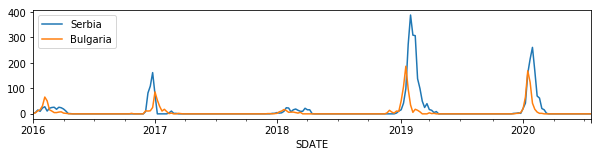

In [47]:
plt.figure(figsize=(10,2))
infA['Serbia'].plot(label='Serbia')
infA['Bulgaria'].plot(label='Bulgaria')
plt.legend()
plt.show()

### Корелације

До сада смо поређења међу земљама и закључке о сличностима и разликама доносили на основу посматрања графика (на пример да ли су висине максимума и позиције исте). Међутим уочавање потенцијалне зависности између броја заражених у две земље може се оценити и квантитативно. 
Једна згодна мера за оцену зависности међу две варијабле (у овом случају да ли је пораст броја заражених грипом у једној земљи праћен сличним порастом у другој) је корелација.
Корелација у случају временских серија какве посматрамо нам говори о томе да ли су трендови пораста и опадања синхронизовани и у којој мери. На пример, два низа назависно генерисаних насумичних бројева имају корелацију 0, тј. пораст и опадање вредности у једном није у вези са другим низом. Знак корелације може бити позитиван (за варијабле код којих је пораст и опадање усклађено и у истом смеру, тј. пораст једне вредности праћен је порастом друге вредности) и негативан (када је пораст једне вредности праћен падом друге вредности).
Коефицијен корелације постоји имплементиран у pandas библиотеци кроз функцију [**corr**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html):

In [48]:
infA[['Bulgaria','Serbia']].corr()

Country,Bulgaria,Serbia
Country,,
Bulgaria,1.000000,0.493097
Serbia,0.493097,1.000000


Излаз ове функције је симетрична табела - добијамо вредности корелације Србије и Бугарске и обратно иако су оне исте. Такође, увек у исходима добијамо и вредности корелације варијабле са самом собом, што је по дефиницији позитивна и максимална вредност коју корелација достиже 1.

Слично можемо поновити овај пут за све издвојене земље из окружења:

In [49]:
matrica_korelacija = infA.corr()
matrica_korelacija

Country,Albania,Bulgaria,Croatia,Hungary,Montenegro,North Macedonia,Romania,Serbia
Country,,,,,,,,
Albania,1.000000,0.643657,0.699159,0.523267,0.771905,0.556544,0.733470,0.803285
Bulgaria,0.643657,1.000000,0.549749,0.423879,0.561262,0.290956,0.688827,0.493097
Croatia,0.699159,0.549749,1.000000,0.456422,0.623969,0.478647,0.702617,0.561384
Hungary,0.523267,0.423879,0.456422,1.000000,0.549580,0.333502,0.474746,0.496825
Montenegro,0.771905,0.561262,0.623969,0.549580,1.000000,0.514751,0.746697,0.753964
North Macedonia,0.556544,0.290956,0.478647,0.333502,0.514751,1.000000,0.434236,0.753320
Romania,0.733470,0.688827,0.702617,0.474746,0.746697,0.434236,1.000000,0.615432
Serbia,0.803285,0.493097,0.561384,0.496825,0.753964,0.753320,0.615432,1.000000


Иако можемо тражити зависности прегледањем и детектовањем бројева близу 1, то није згодно у случају великих табела. Ову матрицу корелација можемо визуализовати функцијом [**matshow**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.matshow.html), она сваком од бројева додељује одређену нијансу боје (палету можете мењати опцијом *cmap*):

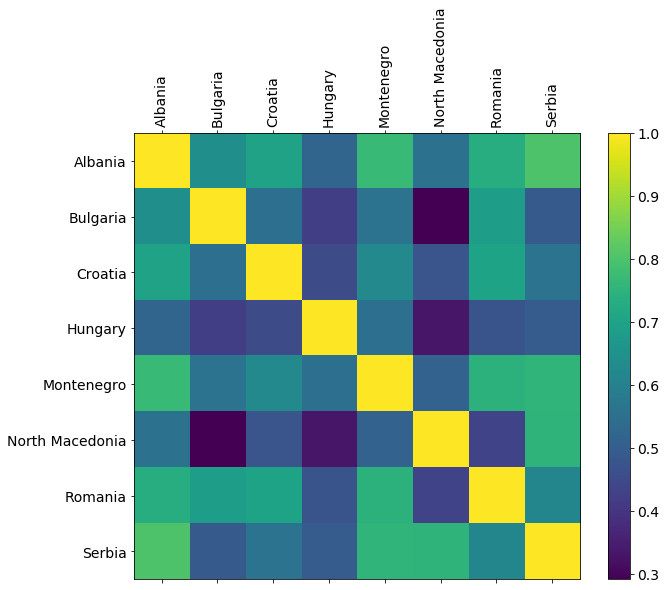

In [50]:
f = plt.figure(figsize=(10, 8))
plt.matshow(matrica_korelacija, fignum=f.number)#, cmap='bone')
plt.xticks(range(matrica_korelacija.shape[0]), matrica_korelacija.columns, fontsize=14, rotation=90)
plt.yticks(range(matrica_korelacija.shape[0]), matrica_korelacija.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Постоји *colorbar* са стране који нам говори да жута значи да су корелације близу 1, док тамно плаво значи 0.3. Међутим, није лако у овој шареној матрици идентификовати оне земље са којима је Србија има највећу корелацију (за то је између осталог крива и ова [оптичка илузија](https://en.wikipedia.org/wiki/Checker_shadow_illusion#/media/File:Checker_shadow_illusion.svg)). Стога ћемо преуредити листу колона/врста, тако да је прва у низу земаља (горе лево) Србија, а затим следе земље са којима је корелација све мања и мања.

Издвојићемо колону вредности корелација Србије и осталих земаља и сортирати је у опадајућем редоследу:

In [51]:
korelacije_srbije = matrica_korelacija['Serbia'].sort_values(ascending=False)
korelacije_srbije

Country
Serbia             1.000000
Albania            0.803285
Montenegro         0.753964
North Macedonia    0.753320
Romania            0.615432
Croatia            0.561384
Hungary            0.496825
Bulgaria           0.493097
Name: Serbia, dtype: float64

Како желимо да нам се колоне и врсте у табели корелација појављују у овом редоследу, сачуваћемо индексе (називе земаља) ове табеле у низ који ће нам послужити као редослед за матрицу корелација:

In [52]:
redosled = korelacije_srbije.index.values
redosled

array(['Serbia', 'Albania', 'Montenegro', 'North Macedonia', 'Romania',
       'Croatia', 'Hungary', 'Bulgaria'], dtype=object)

Добијени редослед колона и врста ћемо искористити функцијом **reindex** да променимо редослед врста, а једноставним позивањем ```matrica_korelacija[redosled]``` да променимо редослед колона. Овако претумбана матрица корелација изгледа овако:

In [53]:
matrica_korelacija = matrica_korelacija[redosled].reindex(redosled)
matrica_korelacija

Country,Serbia,Albania,Montenegro,North Macedonia,Romania,Croatia,Hungary,Bulgaria
Country,,,,,,,,
Serbia,1.000000,0.803285,0.753964,0.753320,0.615432,0.561384,0.496825,0.493097
Albania,0.803285,1.000000,0.771905,0.556544,0.733470,0.699159,0.523267,0.643657
Montenegro,0.753964,0.771905,1.000000,0.514751,0.746697,0.623969,0.549580,0.561262
North Macedonia,0.753320,0.556544,0.514751,1.000000,0.434236,0.478647,0.333502,0.290956
Romania,0.615432,0.733470,0.746697,0.434236,1.000000,0.702617,0.474746,0.688827
Croatia,0.561384,0.699159,0.623969,0.478647,0.702617,1.000000,0.456422,0.549749
Hungary,0.496825,0.523267,0.549580,0.333502,0.474746,0.456422,1.000000,0.423879
Bulgaria,0.493097,0.643657,0.561262,0.290956,0.688827,0.549749,0.423879,1.000000


Сада ћемо поново ову матрицу визуализовати:

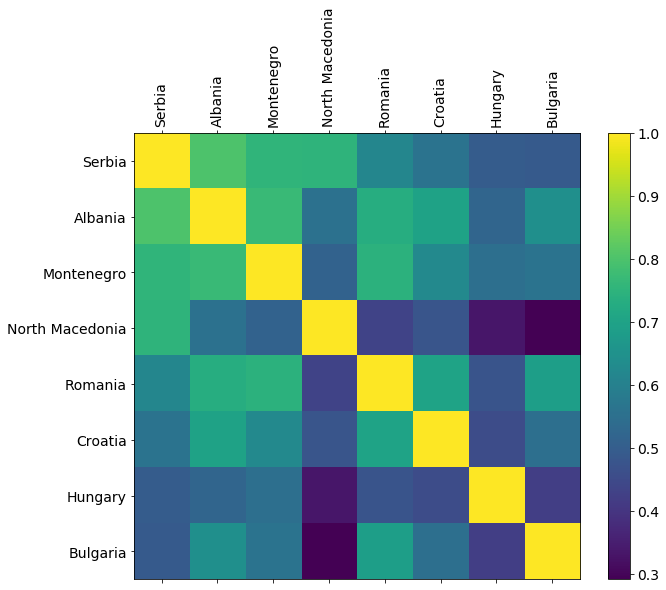

In [54]:
f = plt.figure(figsize=(10, 8))
plt.matshow(matrica_korelacija, fignum=f.number)#, cmap='bone')
plt.xticks(range(matrica_korelacija.shape[0]), matrica_korelacija.columns, fontsize=14, rotation=90)
plt.yticks(range(matrica_korelacija.shape[0]), matrica_korelacija.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Овако већ можемо лакше да уочимо правилности. Примећујемо да Србија, Црна Гора и Албанија имају високе корелације међусобно. Такође, примећујемо да Македонија осим са Србијом има мали коефицијент корелације са осталим земљама. Такође, примеђујемо да земље Европске уније (Бугарска, Румунија, Хрватска, Мађарска) имају мало веће корелације међусобно у односу на корелације са земљама ван ЕУ.

Иако је матрица корелација згодан начин да анализирате пуно временских серија у потрази за повезаностима, обратите пажњу да корелација не значи да постоји узрочно - последична веза (нпр. да се грип најчешће шири из Србије у Црну Гору). Велика корелација између две посматране варијабле може значити да обе зависе од неке треће, коју у том тренутку не разматрате, овде можда временски услови, или већ приказана сезоналност у подацима. Један од задатака у наставку, позива вас да истражите како се вреднсоти у овој матрици корелација мењају ако узмете у обзир сезоналност грипа.

### Задаци

1. Нацртајте линијски дијаграм (попут првог у овој радној свесци) посматрајући само један тип вируса, нпр. *AH1N12009* за Србију или неку другу земљу чије податке имате у другим доступним табелама. 
Поред дебљине линије, пробајте да варирате боју или тип линије (да ли је пуна, тачкаста, итд.). Све опције функције **plot** можете истражити овде: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

2. Табеле са подацима Светске здравствене организације садрже и текстуалну колону 'TITLE'. Користећи функцију 'unique' истражите које вредности постоје у овој табели, а затим нацртајте график за Србију (или земљу по избору) на коме су тачкице које представљају број заражених узорака ('ALL_INF') током времена бити другачије обојене зависно од вредности у колони 'TITLE'.

3. У анализи корелација међу земљама, фокусирали смо се само на земље са којима се Србија граничи и само на анализу вируса типа А, истражи како се корелације међу земљама разликују уколико се разматра вирус типа Б или уколико се разматра укупан број заражених узорака. Слично, можеш одабрати било коју другу листу земаља или истражити како изгледа матрица корелација ако су у разматрању све земље из сета података. Специјално провери корелације између података у Србији и некој од земаља из Јужне Америке, шта примећујеш?

4. (а) Као што је поменуто у опису корелација, очекујемо да трендови раста и опадања у листама насумично генерисаних бројева нису у вези те ће корелације бити 0 - провери то! (У оквиру библиотеке *numpy* можеш генерисати n униформно распоређених насумичних бројева између 0 и 1 на следећи начин ```np.random.rand(n)```)

4. (б) А шта ако низови бројева нису потпуно насумични? На пример:
```
a = [0.5*np.sin(i)+np.random.rand() for i in range(100)]
b = [0.5*np.sin(i)+np.random.rand()  for i in range(100)]
```
Нацртајте ове низове, а затим срачунајте и корелацију међу њима. Истражите како се вредности мењају ако промените коефицијент испред синуса, или ако уместо синуса искористите неку другу функцију.

4. (в) Надам се да су вас претходни кораци заинтригирали у вези са претходно анализираним бројем заражених грипом и уоченим сезонским трендом у порасту и паду овог броја (који није баш синусна функција али смо приметили неку периодичност). Како бисмо проверили да ли је сезоналност грипа потенцијалан узрок високих корелација међу бројевима заражених у земљама из окружења, можемо приступити *detrendovanju* података. Уместо укупног броја заражених узорака које смо до сада анализирали посматрајмо одступање од вишегодишњег (нпр. петогодишњи) просека. За сваку од земаља које хоћете да анализирате:
(1) израчунајте просечан број заражених за сваку недељу у петогодишњем периоду
(2) за сваку од недеља током петогодишњег периода израчунајте колико је више (или мање) заражених у односу на петогодишњи просек за ту недељу
(3) израчунајте корелације оваквих низова и упоредите вредности са претходно добијеним корелацијама
Шта примећујете?